In [1]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Pool

In [2]:
#http://breakthroughinitiatives.org/opendatasearch
#smallest voyager raw file (33.1 mb)
smallerraw='../data/blc0_2bit_guppi_57396_VOYAGER1_0006.0013.raw'
#small voyager raw file (66.1 mb)
smallraw='data/blc1_2bit_guppi_57396_VOYAGER1_0006.0013.raw'
#voyager raw file (~4gb)
bigraw='../data/blc2_2bit_guppi_57396_VOYAGER1_0006.0012.raw'
#M31 raw file (66.1 mb)
M31raw='../data/blc1_2bit_guppi_57398_MESSIER031_0019.0013.raw'
#large raw file (~16 gb)
DIAGraw = "../data/blc04_guppi_57899_53848_DIAG_HIP19849_0002.0000.raw"


file = open("test-128-64.raw", "rb")

In [3]:
header, h_length, header_dict = read_header(file)

In [4]:
print(int(header_dict["BLOCSIZE"]))
print(int(header_dict["NBITS"]))

134217728
8


In [5]:
channel_size = int(int(header_dict["BLOCSIZE"])/(int(header_dict["OBSNCHAN"]) * 2 * int(header_dict["NBITS"])/8))
channel_size

1048576

In [6]:
channels = read_channels(file, header_dict)

(64, 524288, 4)


In [7]:
channels[0]

array([[  0,   0,  15,  -7],
       [  0,   0,   3,  -3],
       [  0,   0,   5,   0],
       ...,
       [  0,   0,  10,   2],
       [  0,   0, -24,  21],
       [  0,   0, -37, -42]], dtype=int8)

In [8]:
first = channels[0]
print(first.shape)

(524288, 4)


In [9]:
pol0_reals = first[...,0]
pol0_imags = first[...,1]
pol1_reals = first[...,2]
pol1_imags = first[...,3]

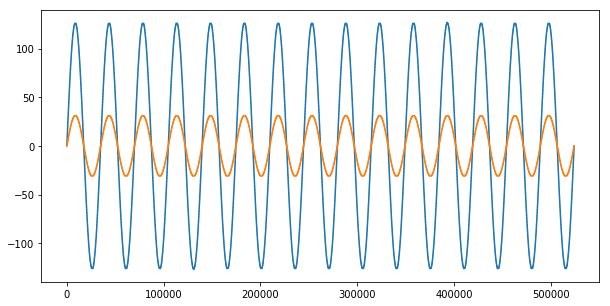

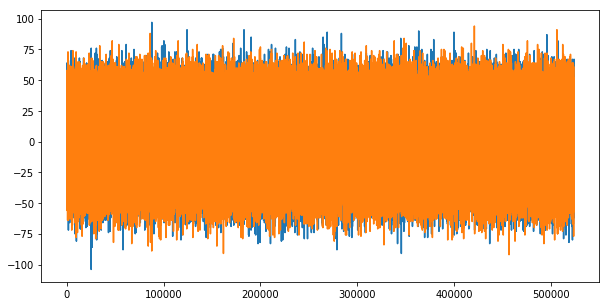

In [10]:
plt.figure(figsize=(10,5))
plt.plot(pol0_reals)
plt.plot(pol0_imags)

plt.figure(figsize=(10,5))
plt.plot(pol1_reals)
plt.plot(pol1_imags)

(64, 524288, 4)


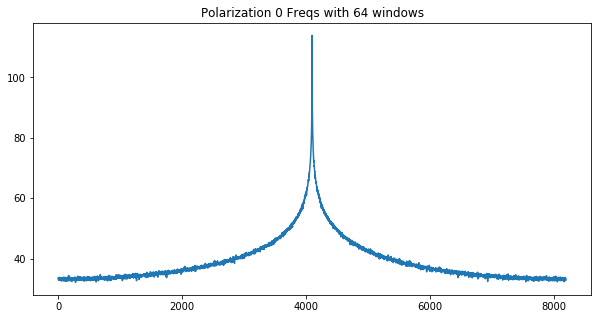

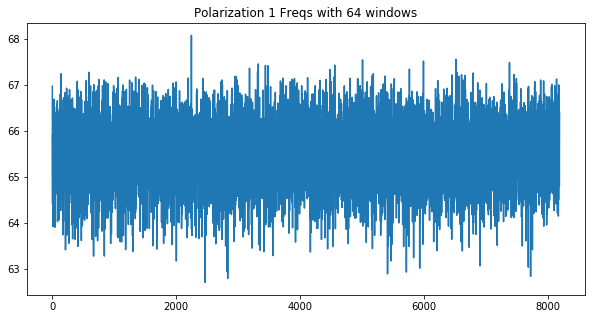

In [11]:
plot_channel_bartlett(file, header_dict, 64)